In [16]:
import numpy as np
import random
import matplotlib.pyplot as plt


def distance(p1,p2):
    p1=np.array(p1)
    p2=np.array(p2)
    return np.sqrt(np.sum(np.power(p1-p2,2)))

In [48]:
def find_nearest_neibors(p,points,k):
    distances=np.zeros(points.shape[0])
    for i in range(len(points)):
        distances[i]=distance(p,points[i])
    ind=np.argsort(distances) 
    return ind[:k] 
  

points=np.array([[1,1],[1,2],[1,3],[2,1],[2,2],[2,3],[3,1],[3,2],[3,3]])
p=np.array([2.5,2])

print(find_nearest_neibors(p,points,k=2))
#print(points[ind])

[4 7]


In [55]:
import random
def majority_vote(votes):    
    vote_counts={}
    for vote in votes:
        if vote in vote_counts:
            vote_counts[vote]+=1
        else:
            vote_counts[vote]=1

    winners=[]
    max_counter=max(vote_counts.values())
    for vote, count in vote_counts.items():
        if max_counter==count:
            winners.append(vote)
    return random.choice(winners) 


print (majority_vote([1,2,3,2,1,1,2,3]))

def majority_vote_short(votes):
    
    mode, count = ss.mstats.mode(votes)
    return mode

print (majority_vote_short([1,2,3,2,1,1,2,3]))


2
[1.]


(array([[-1.05202543,  1.1015419 ],
       [-0.59044459,  1.55151297],
       [-0.8938837 ,  0.83510454],
       [ 0.1171843 ,  0.03598187],
       [-0.71117133, -0.64252401],
       [ 0.43517124, -2.58978167],
       [ 0.16352295, -1.35248175],
       [-0.40119525, -1.98659978],
       [-1.47299892, -1.23455888],
       [ 0.02088208, -0.22693107],
       [-2.14119134, -0.89508141],
       [-0.43731977, -0.20188123],
       [ 0.66282836, -0.58673289],
       [ 0.68973342, -0.49501133],
       [-0.14609267, -0.59915247],
       [-0.46228843, -1.97072232],
       [-0.3629959 , -0.75211557],
       [ 0.38641227, -0.94287517],
       [-0.57602456,  2.85903887],
       [ 2.03148421, -0.54198191],
       [ 1.20795629,  1.31644984],
       [ 2.42282799,  0.22909603],
       [ 1.98770746,  1.54098948],
       [ 0.32605144,  0.73018293],
       [ 1.75371616,  1.5856052 ],
       [ 2.01777664,  3.67998333],
       [ 1.69033746,  0.95876439],
       [ 2.39193504,  1.79045604],
       [ 2.01040078

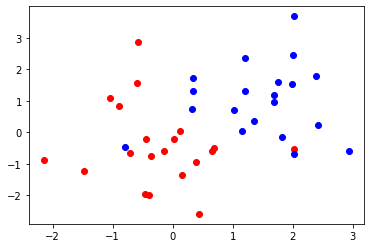

In [62]:
def knn_predict(p,points,outcomes,k):
    ind=find_nearest_neibors(p,points,k)
    return majority_vote(outcomes[ind])
    
outcomes = np.array([0,0,0,0,1,1,1,1,1])
#print (knn_predict(np.array([2.5,2.7]),points,outcomes,k=2))
    
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

def generate_synth_data(n=50):
    
    points=np.concatenate((ss.norm(0,1).rvs((n,2)),ss.norm(1,1).rvs((n,2))),axis=0)
    outcomes=np.concatenate((np.repeat(0,n),np.repeat(1,n)))
    return (points,outcomes)

n=20
points,outcomes=generate_synth_data(n=20)
print((points, outcomes))
plt.figure()
plt.plot(points[:n,0],points[:n,1],"ro")
plt.plot(points[n:,0],points[n:,1],"bo")
plt.savefig("bivardata.pdf.pdf")
print(ss.norm(0,1).rvs(20,2))
print(ss.norm(1,1).rvs(20,2))
print(points[n:,0])

In [75]:
import numpy as np
def make_prediction_grid(predictors,outcomes,limits,h,k):
    """classify each point on the prediction grid."""
    (x_min,x_max,y_min,y_max)=limits
    xs=np.arange(x_min,x_max,h)
    ys=np.arange(y_min,y_max,h)
    xx,yy = np.meshgrid(xs,ys)
    print((xx,yy))

    prediction_grid=np.zeros(xx.shape, dtype=int)
    for i, x in enumerate(xs):
        for j, y in enumerate(ys):
            p=np.array([x,y])
            prediction_grid[j,i]=knn_predict(p,predictors,outcomes,k)

    return (xx,yy,prediction_grid)

k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
print(make_prediction_grid(predictors,outcomes,limits,h,k))


(array([[-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       ...,
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9]]), array([[-3. , -3. , -3. , ..., -3. , -3. , -3. ],
       [-2.9, -2.9, -2.9, ..., -2.9, -2.9, -2.9],
       [-2.8, -2.8, -2.8, ..., -2.8, -2.8, -2.8],
       ...,
       [ 3.7,  3.7,  3.7, ...,  3.7,  3.7,  3.7],
       [ 3.8,  3.8,  3.8, ...,  3.8,  3.8,  3.8],
       [ 3.9,  3.9,  3.9, ...,  3.9,  3.9,  3.9]]))
(array([[-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       ...,
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9]]), array([[-3. , -3. , -3. , ..., -3. , -3. , -3. ],
      

(array([[-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       ...,
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9]]), array([[-3. , -3. , -3. , ..., -3. , -3. , -3. ],
       [-2.9, -2.9, -2.9, ..., -2.9, -2.9, -2.9],
       [-2.8, -2.8, -2.8, ..., -2.8, -2.8, -2.8],
       ...,
       [ 3.7,  3.7,  3.7, ...,  3.7,  3.7,  3.7],
       [ 3.8,  3.8,  3.8, ...,  3.8,  3.8,  3.8],
       [ 3.9,  3.9,  3.9, ...,  3.9,  3.9,  3.9]]))


PermissionError: [Errno 13] Permission denied: 'knn_synth_5.pdf'

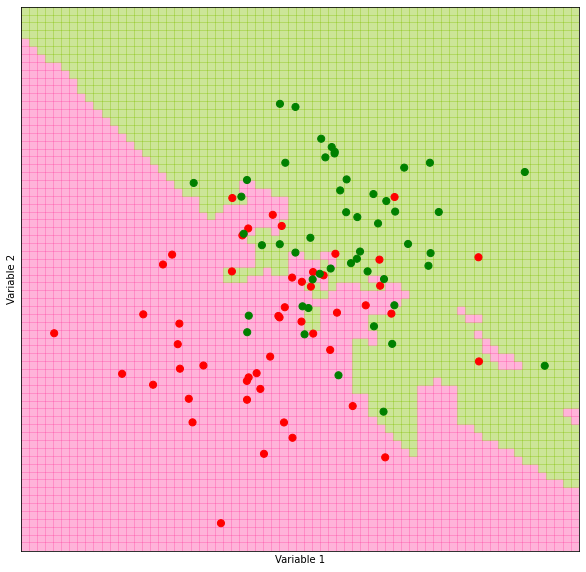

In [77]:
def plot_prediction_grid (xx, yy, prediction_grid, filename):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink","lightskyblue", "yellowgreen"])
    observation_colormap = ListedColormap (["red","blue","green"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.scatter(predictors[:,0], predictors [:,1], c = outcomes, cmap = observation_colormap ,s = 50)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))
    plt.savefig(filename)

(predictors,outcomes)=generate_synth_data()

k=5;filename="knn_synth_5.pdf";limits=(-3,4,-3,4) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
#print((xx,yy,prediction_grid))
plot_prediction_grid(xx,yy,prediction_grid,filename)


k=50;filename="knn_synth_50.pdf";limits=(-3,4,-3,4) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)


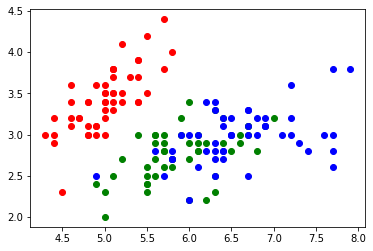

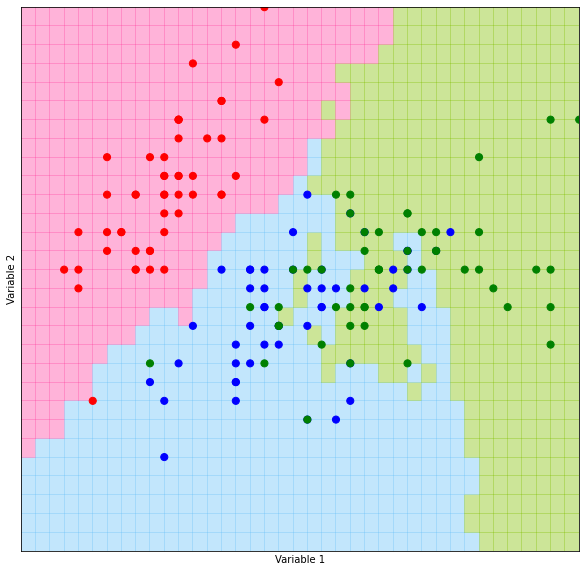

In [38]:
from sklearn import datasets
iris = datasets.load_iris()
iris["data"]
predictors=iris.data[:, 0:2]
outcomes = iris.target
plt.plot(predictors[outcomes==0][:,0],predictors[outcomes==0][:,1],"ro")
plt.plot(predictors[outcomes==1][:,0],predictors[outcomes==1][:,1],"go")
plt.plot(predictors[outcomes==2][:,0],predictors[outcomes==2][:,1],"bo")
plt.savefig("iris.pdf")

k=5;filename="iris_grid.pdf";limits=(4,8,1.5,4.5) ;h=0.1
(xx,yy,prediction_grid)=make_prediction_grid(predictors,outcomes,limits,h,k)
plot_prediction_grid(xx,yy,prediction_grid,filename)


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(predictors, outcomes)
sk_predictions = knn.predict(predictors)
sk_predictions.shape
sk_predictions[0:10]

my_predictions = np.array([knn_predict(p, predictors, outcomes, 5) for p in predictors])
my_predictions.shape

print(100*np.mean(sk_predictions== my_predictions))
print(100*np.mean(sk_predictions== outcomes))
print(100*np.mean(my_predictions== outcomes))

96.0
83.33333333333334
84.66666666666667
